<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2022/Lab00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 간단한 Matrix를 정의하고, 이를 흑백의 영상으로 모니터에 display를 해보기
- numpy, matplotlib를 활용하자
- https://numpy.org/numpy-tutorials/
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.array([[0,0,0],[1,0,1],[1,1,1]])
print(a)

In [ ]:
plt.imshow(a,cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
b = np.arange(0,9)
b = np.reshape(a,(3,3))
print(b)

In [ ]:
plt.imshow(b,cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
a = np.reshape(np.arange(0,9),(1,9))
b = np.ones((9,1))
print(a.shape,b.shape)

In [ ]:
print(a*b)

In [ ]:
plt.imshow(a*b,cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(np.transpose((a*b),(1,0)),cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(np.transpose((a*b),(1,0)),cmap='gray',vmin=0, vmax=4)
plt.colorbar()
plt.show()

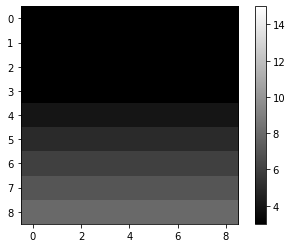

In [11]:
plt.imshow(np.transpose((a*b),(1,0)),cmap='gray',vmin=3, vmax=15)
plt.colorbar()
plt.show()

## 사진파일을 불러와서 matrix의 크기, pixel의 개수, 각 pixel의 data type을 확인하기
- 각자 핸드폰 카메라를 이용해서 사진을 찍고, 작업공간으로 파일을 가져와 scikit-image를 이용하여 불러보자.
- https://scikit-image.org/docs/stable/user_guide/getting_started.html


In [12]:
from skimage import io

In [13]:
myimg = io.imread('IMG_1958.png')
print(myimg.shape)
print(myimg.dtype)

(3024, 4032, 4)
uint8


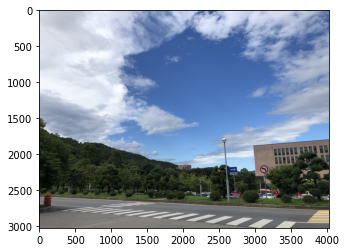

In [14]:
plt.imshow(myimg)
plt.show()

- 칼라영상데이터인 경우 흑백으로 변환하여 display를 진행해보자.

In [15]:
from skimage.color import rgb2gray

myimg = rgb2gray(myimg)
myimg.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


(3024, 4032)

In [ ]:
#plt.figure(figsize=(16,9))
plt.imshow(myimg,cmap='gray')
plt.colorbar()
plt.show()

In [17]:
print(myimg.dtype)

float64


## Dicom파일을 불러와서 metadata를 확인하고 image를 display해보기
- dicom파일을 작업공간으로 가져온 후, pydicom을 이용하여 불러보자.
- https://pydicom.github.io/pydicom/stable/auto_examples/index.html


In [ ]:
!pip install pydicom

In [19]:
import pydicom

In [20]:
dcm = pydicom.dcmread('image-00024.dcm')

In [ ]:
print(dcm)

In [ ]:
print("modality:",dcm.Modality)
print("hospital:",dcm.InstitutionName)
print("voxelsize:",dcm.PixelSpacing)
print("slice thickness:",dcm.SliceThickness)

In [ ]:
f = dcm.pixel_array
print(f.shape)
print("Lmin : ",np.min(f))
print("Lmax : ",np.max(f))

In [ ]:
plt.imshow(f, cmap='gray')
plt.colorbar()
plt.show()

## Nifti파일을 불러와서 metadata를 확인하고 image를 display해보기
- nibabel을 활용해보자.
- https://nipy.org/nibabel/tutorials.html#tutorials


In [ ]:
!pip install nibabel

In [26]:
import nibabel as nib

In [27]:
h = nib.load('ct_sample.nii.gz')

In [ ]:
print(h)

In [29]:
imgdata = h.get_fdata()

In [ ]:
print(imgdata.shape)
print(imgdata.dtype)

In [ ]:
plt.imshow(imgdata[:,:,100],cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(np.rot90(imgdata[:,256,:]),cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
v = h.header['pixdim']
print(v)

In [ ]:
plt.imshow(np.rot90(imgdata[:,256,:]),cmap='gray',aspect=v[3]/v[1])
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(np.rot90(imgdata[256,:,:]),cmap='gray',aspect=v[3]/v[2])
plt.colorbar()
plt.show()